In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
file_datos ="datos_corregidos.csv"
datos = pd.read_csv(file_datos)
datos




,height,SPEED,utm_x,utm_y,distance,slope,sum_distance,velocidad
0,2646.850098,0.979155,8.671938e+07,1.892181e+07,215.500803,-0.010411,2.155008e+02,215.500803
1,2644.606445,0.532513,8.671953e+07,1.892165e+07,144.444666,0.011304,3.599455e+02,144.444666
2,2646.239253,NaN,8.671944e+07,1.892177e+07,11.373631,-0.014228,3.713191e+02,11.373631
3,2646.077424,NaN,8.671944e+07,1.892176e+07,11.373631,-0.014228,3.826927e+02,11.373631
4,2645.915596,NaN,8.671945e+07,1.892174e+07,11.373631,-0.014228,3.940664e+02,11.373631
...,...,...,...,...,...,...,...,...
30570,2057.364502,0.883016,8.627987e+07,2.600186e+07,12.776192,0.000153,9.267043e+06,12.776192
30571,2057.366455,0.808202,8.627987e+07,2.600185e+07,13.511319,0.000181,9.267057e+06,13.511319
30572,2057.368896,0.615988,8.627987e+07,2.600184e+07,6.155153,0.000397,9.267063e+06,6.155153
30573,2057.371338,0.587766,8.627987e+07,2.600183e+07,6.155153,0.000238,9.267069e+06,6.155153


In [28]:
datos["next_vel"] = datos["distance"].shift(-1)

datos['aceleracion'] = datos["distance"] - datos["next_vel"]

In [29]:
datos

,height,SPEED,utm_x,utm_y,distance,slope,sum_distance,velocidad,next_vel,aceleracion
0,2646.850098,0.979155,8.671938e+07,1.892181e+07,215.500803,-0.010411,2.155008e+02,215.500803,144.444666,7.105614e+01
1,2644.606445,0.532513,8.671953e+07,1.892165e+07,144.444666,0.011304,3.599455e+02,144.444666,11.373631,1.330710e+02
2,2646.239253,NaN,8.671944e+07,1.892177e+07,11.373631,-0.014228,3.713191e+02,11.373631,11.373631,4.823802e-09
3,2646.077424,NaN,8.671944e+07,1.892176e+07,11.373631,-0.014228,3.826927e+02,11.373631,11.373631,0.000000e+00
4,2645.915596,NaN,8.671945e+07,1.892174e+07,11.373631,-0.014228,3.940664e+02,11.373631,11.373631,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
30570,2057.364502,0.883016,8.627987e+07,2.600186e+07,12.776192,0.000153,9.267043e+06,12.776192,13.511319,-7.351271e-01
30571,2057.366455,0.808202,8.627987e+07,2.600185e+07,13.511319,0.000181,9.267057e+06,13.511319,6.155153,7.356166e+00
30572,2057.368896,0.615988,8.627987e+07,2.600184e+07,6.155153,0.000397,9.267063e+06,6.155153,6.155153,-4.049216e-07
30573,2057.371338,0.587766,8.627987e+07,2.600183e+07,6.155153,0.000238,9.267069e+06,6.155153,NaN,NaN


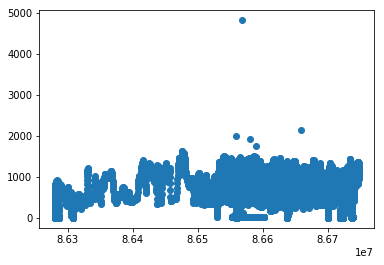

In [30]:
plt.scatter(datos['utm_x'], datos['distance'])

In [31]:
def est_energia(data, densidad_aire = 0.893, fr=0.008, rd=0.191, area_front=3.419, masa=3185, g=9.8, cd=0.5):
    
    frr = fr * masa * g * np.cos(datos['slope'])
    fg = masa * g *np.sin(datos['slope'])
    fa = masa * datos['distance'] / datos['aceleracion']
    fd = (0.5) * densidad_aire * cd * area_front * (datos['distance'] ** 2)

    fx = fa + fg + fd +frr

    potencia = fx * datos['distance'] * len(datos['distance'])
    
    energia = potencia 

    datos['energia'] = energia

    return datos

In [32]:
datos_energia = est_energia(datos)
datos_energia

/Users/jayguru/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in cos
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jayguru/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sin
  result = getattr(ufunc, method)(*inputs, **kwargs)


,height,SPEED,utm_x,utm_y,distance,slope,sum_distance,velocidad,next_vel,aceleracion,energia
0,2646.850098,0.979155,8.671938e+07,1.892181e+07,215.500803,-0.010411,2.155008e+02,215.500803,144.444666,7.105614e+01,2.967130e+11
1,2644.606445,0.532513,8.671953e+07,1.892165e+07,144.444666,0.011304,3.599455e+02,144.444666,11.373631,1.330710e+02,8.826279e+10
2,2646.239253,NaN,8.671944e+07,1.892177e+07,11.373631,-0.014228,3.713191e+02,11.373631,11.373631,4.823802e-09,2.611468e+18
3,2646.077424,NaN,8.671944e+07,1.892176e+07,11.373631,-0.014228,3.826927e+02,11.373631,11.373631,0.000000e+00,inf
4,2645.915596,NaN,8.671945e+07,1.892174e+07,11.373631,-0.014228,3.940664e+02,11.373631,11.373631,0.000000e+00,inf
...,...,...,...,...,...,...,...,...,...,...,...
30570,2057.364502,0.883016,8.627987e+07,2.600186e+07,12.776192,0.000153,9.267043e+06,12.776192,13.511319,-7.351271e-01,-2.147494e+10
30571,2057.366455,0.808202,8.627987e+07,2.600185e+07,13.511319,0.000181,9.267057e+06,13.511319,6.155153,7.356166e+00,2.579732e+09
30572,2057.368896,0.615988,8.627987e+07,2.600184e+07,6.155153,0.000397,9.267063e+06,6.155153,6.155153,-4.049216e-07,-9.111349e+15
30573,2057.371338,0.587766,8.627987e+07,2.600183e+07,6.155153,0.000238,9.267069e+06,6.155153,NaN,NaN,NaN


In [33]:
datos_energia_pos = datos_energia.loc[datos_energia['energia'] > 0]
datos_energia_pos.replace([np.inf, -np.inf], np.nan, inplace=True)
datos_energia_pos.dropna(inplace=True)
energia_total = datos_energia_pos['energia'].sum()
energia_total

/Users/jayguru/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/Users/jayguru/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1.495641981530111e+19

In [22]:
consumo = energia_total / (0.3 * 0.97)
consumo

1681001853399882.8

In [23]:
datos = pd.read_csv("datasets/datos viaje 1 bien.csv")
datos

,INDEX,TRACK ID,VALID,UTC DATE,UTC TIME,LOCAL DATE,LOCAL TIME,MS,latitud,N/S,longitud,E/W,altitud,SPEED,HEADING,G-X,G-Y,G-Z
0,1,1,FIXED,2017/5/11,19:13:11,2017/5/11,14:13:11,0,2.897759,S,79.022597,W,2646.850098,0.979155,295.079105,0.0,0.0,0.0
1,2,1,FIXED,2017/5/11,19:13:12,2017/5/11,14:13:12,0,2.897728,S,79.022661,W,2644.606445,0.532513,358.363241,0.0,0.0,0.0
2,3,1,FIXED,2017/5/11,19:13:13,2017/5/11,14:13:13,0,2.897713,S,79.022662,W,2641.030273,1.209864,27.267803,0.0,0.0,0.0
3,4,1,FIXED,2017/5/11,19:13:14,2017/5/11,14:13:14,0,2.897703,S,79.022656,W,2641.576416,1.654551,334.563075,0.0,0.0,0.0
4,5,1,FIXED,2017/5/11,19:13:15,2017/5/11,14:13:15,0,2.897692,S,79.022661,W,2641.022461,1.223109,8.434918,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12701,12702,1,FIXED,2017/5/11,22:49:7,2017/5/11,17:49:7,0,3.986196,S,79.202093,W,2057.537109,1.428345,159.967063,0.0,0.0,0.0
12702,12703,1,FIXED,2017/5/11,22:49:8,2017/5/11,17:49:8,0,3.986199,S,79.202092,W,2057.590576,2.161674,259.697433,0.0,0.0,0.0
12703,12704,1,FIXED,2017/5/11,22:49:9,2017/5/11,17:49:9,0,3.986200,S,79.202097,W,2057.676758,1.973812,258.623013,0.0,0.0,0.0
12704,12705,1,FIXED,2017/5/11,22:49:10,2017/5/11,17:49:10,0,3.986201,S,79.202102,W,2057.753418,1.390541,255.767218,0.0,0.0,0.0
